# Bank Churn Analysis


The goal of this project is to predict customer churn using data from a bank. The dataset contains features such as customer demographics, credit score, balance, and whether they churned or not (target variable). The aim is to develop a machine learning model that accurately predicts churners, allowing the bank to target retention efforts effectively.

# Initial Overview of the Dataset:
The dataset seems to contain information about bank customers, with columns that could be useful for predicting churn (whether a customer leaves the bank). Here's a brief breakdown of the columns:

1. customer_id: Unique identifier for each customer.
2. credit_score: A numerical feature representing the credit score of the customer.
3. country: The country the customer is from (categorical feature).
4. gender: Gender of the customer (categorical).
5. age: The age of the customer.
6. tenure: How many years the customer has been with the bank.
7. balance: The bank balance of the customer.
8. products_number: The number of products the customer uses from the bank.
9. credit_card: Whether the customer owns a credit card (binary: 1 for Yes, 0 for No).
10. active_member: Whether the customer is an active member (binary: 1 for Yes, 0 for No).
11. estimated_salary: Estimated salary of the customer.
12. churn: The target variable indicating whether the customer churned (1 for Yes, 0 for No).


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [117]:
df=pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Exploratory Data Analusis

Let's perform a thorough Exploratory Data Analysis (EDA) starting with basic steps:

1. Data Quality Check
2. Statistical Summary
3. Data Distribution
4. Categorical Variable Analysis
6. Quantifying missing values
7. Correlation Analysis
8. Feature Relation ship

In [118]:
df.shape

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 10000 rows and 18 columns


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [120]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [121]:
#Lets start with identification of numerical and categorical data

df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


This dataset has, 7 int columns, 2 floating type data and 2 data objects. Let's go ahead and start with the EDA

In [122]:
#Quantifying missing data

df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


We do not have any missing data in our dataset

Going through this data, we can see that pandas has detected the salary and balance datatype as float which in my opinion is correct as these values are continuous and not discrete values. Rest of the columns are also in appropriate datatypes.

In [123]:
#Identifying numerical and categorical variables to correctly identify variable types, we need to look at the data type and inspect their values as well.

df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [124]:
!pip install sweetviz
import sweetviz as sv
report=sv.analyze(df)
report.show_html('bank_churn_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bank_churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [125]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

This bank has operations in 3 countries: France, Spain and Germany

In [126]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [127]:
df['Age'].value_counts().sort_values(ascending=False).head(10)

,count
Age,
37,478
38,477
35,474
36,456
34,447
33,442
40,432
39,423
32,418


most of the customers are between age group 31 to 37


# **Initial Assumption**



*   **Age and Churn:** Customers between age 18 till 30 are most likely to churn as most of the people are exploring new banks/services that caters to their requirements
*   **Products and Chrun:** it is most likely that the customers having multiple products are highly satisfied and loyal customers
*   **Balance and Churn:** The customers having high bank balance are the loyal customers because they seem to enjoy the bank services are most likely part of the bank for too long
*   **Credit Card and Churn:** This seems to be tricky, the customer is more likely to churn if the services provided for the credit cards are not up to their expectations

Lets further dive into the data



# Univariate and Bivariate Analysis

In [128]:
#Lets plot the data to visualize the age and salary distribution of the data

#identify the numerical features

num_features=[]
for i in df.columns:
  if (df[i].nunique()>11) and (i!='customer_id'):
    num_features.append(i)

print(num_features)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']


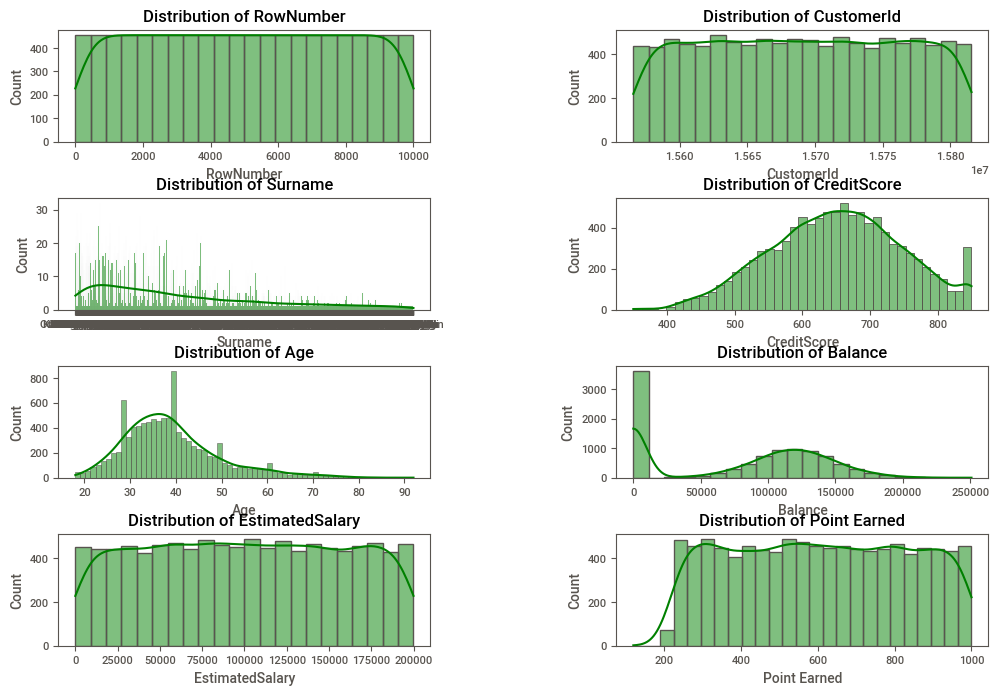

In [129]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

#Change the subplot grid to accommodate all features
#The grid should have enough space to display all histograms
#Assuming 'num_features' contains 8 elements, a 4x2 grid is suitable.
for i in range(len(num_features)):
  # Adjust subplot grid to 4 rows, 2 columns
  plt.subplot(4,2,i+1)  # Updated to 4x2 grid
  sns.histplot(df[num_features[i]],kde=True, color='green', line_kws={'color': 'blue'})
  plt.xlabel(num_features[i])
  plt.ylabel('Count')
  plt.title(f'Distribution of {num_features[i]}')

In [130]:
#Categorical Features

categorical_features=[]

for i in df.columns:
  if (df[i].nunique() <= 11) and (i!='churn'):
              categorical_features.append(i)

print(categorical_features)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


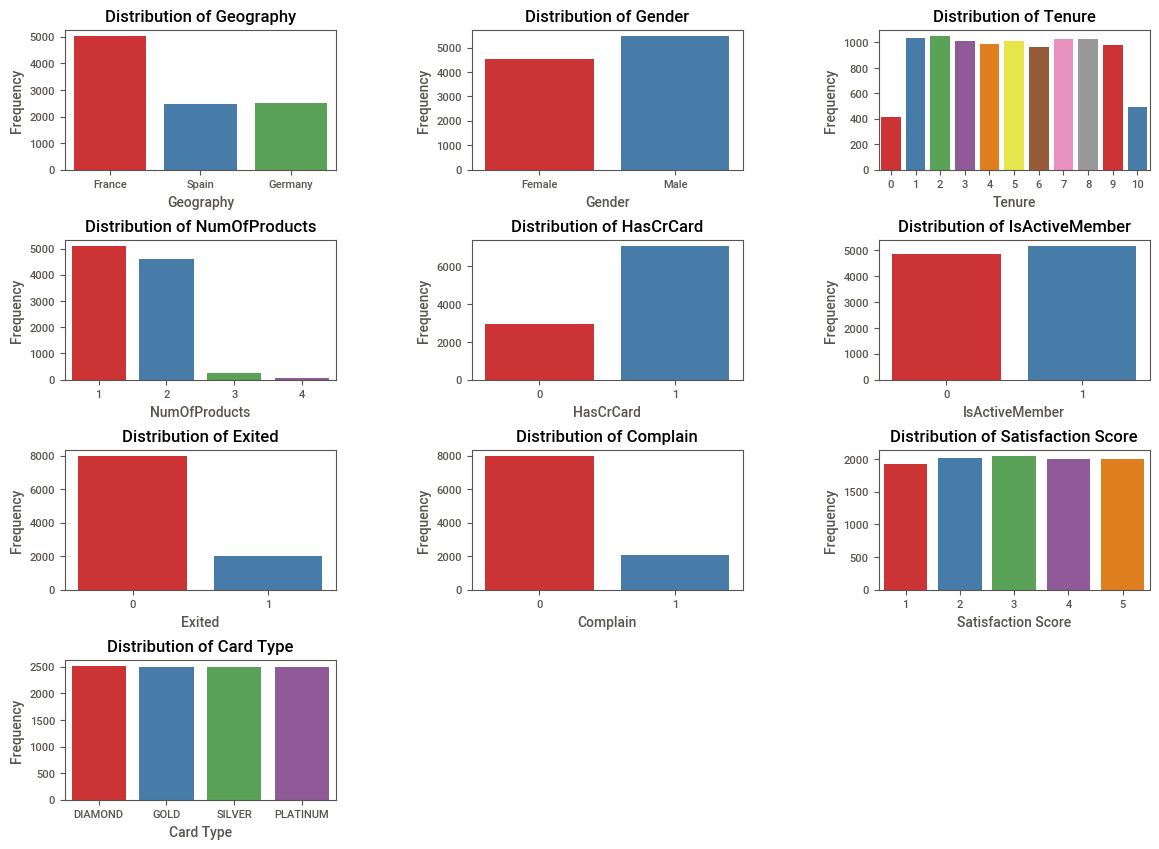

In [131]:
plt.figure(figsize=(14, 10))  # Adjust figure size for better layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Calculate the number of rows needed
num_rows = int(np.ceil(len(categorical_features) / 3))  # 3 columns

for i in range(len(categorical_features)):
  plt.subplot(num_rows, 3, i + 1)  # Updated to dynamic row count
  sns.countplot(x=df[categorical_features[i]], palette="Set1")
  plt.xlabel(categorical_features[i])
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {categorical_features[i]}')

plt.show()

# Key Observations from the Visualizations:
# Distribution of Numerical Features:
* **Credit Score:** The distribution is fairly normal with a slight skew towards higher scores.
* **Age:** There is a large group of customers in the 30–40 age range, with fewer customers at the older and younger ends of the spectrum.
* **Balance:** Many customers have a zero balance, while the rest show a fairly wide distribution.
* **Estimated Salary:** The salary distribution is quite uniform, indicating a diverse range of income levels among customers.

# Categorical Variables and Churn:

* **Country vs Churn:** The churn rate seems fairly consistent across the three countries, though it might be slightly higher in Germany.
* **Gender vs Churn:** Both male and female customers seem to churn at similar rates, with a slightly higher number of male customers overall.
* **Tenure:** The tenure is relatively evenly distributed, although there is a slight peak at 1 year.
* **Products Number:** Most customers use only one or two products, with very few using three or more.
* **Credit Card:**: Most users are using credit cards, pointing that the customers can churn.
* **Active_member:** Active members are slightly higher than the inactive members. Further analysis should be done for the inactive members, since those member can leave the bank anytime


# **Churn Analysis**

In [132]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [133]:
df['Exited'].value_counts()

,count
Exited,
0,7962
1,2038


In [134]:
churn_rate=df['Exited'].value_counts()/df.shape[0]*100
churn_rate

print(churn_rate[1])
#We have 20% of churned customer showing that the data is highly imbalanced

20.380000000000003


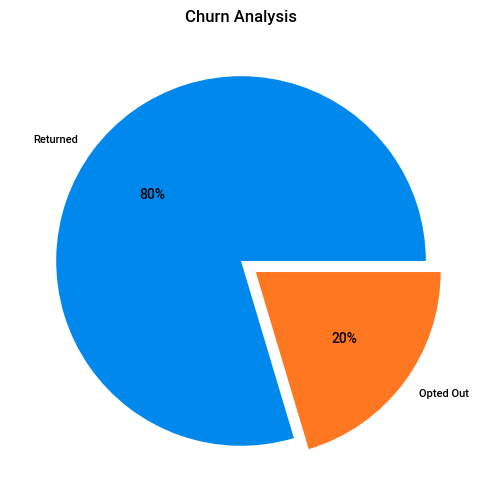

In [135]:
plt.figure(figsize=(10,6))

keys=["Returned","Opted Out"]
explode = [0, 0.1]
plt.pie(churn_rate,labels=keys,explode=explode, autopct='%.0f%%')
plt.title('Churn Analysis')
plt.show()

# Correlation Analysis:

We will now perform a correlation analysis to check relationships between the numerical features and the target variable (churn), and then proceed with more detailed pairwise feature relationships to gather deeper insights. Let's generate a correlation matrix and visualize it using a heatmap.

In [136]:
#Correlation Analysis for Numerical Features

correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


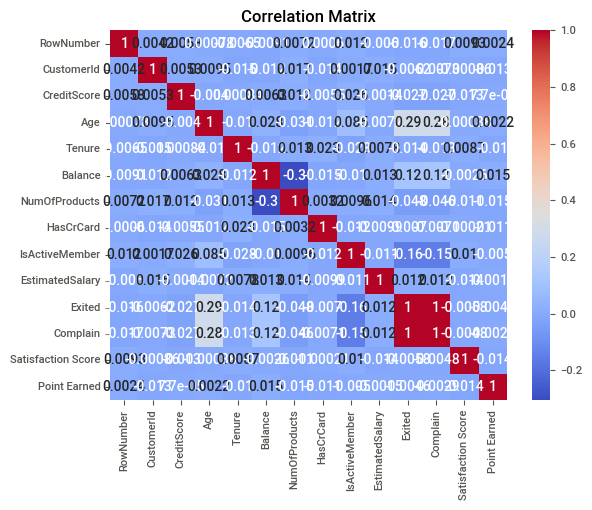

In [137]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation heatmap, we can observe the following key points:

# **Churn Correlation:**

* **Balance:** There is a moderate positive correlation between balance and churn (0.12), suggesting that customers with higher balances may be slightly more likely to churn.
* **Age:** A positive correlation with churn (0.29), indicating that older customers are more likely to churn.
* **Products Number:** Shows a slight positive correlation with churn (0.10), meaning customers with more products may be more prone to churn.
* **Active Member**: Has a negative correlation (-0.16) with churn, meaning active members are less likely to churn.
* **Credit Score:** Has a slight negative correlation (-0.07) with churn, indicating that customers with lower credit scores are slightly more likely to churn.

**Other Feature Correlations:**

* **Credit Score and Balance:** These two are slightly positively correlated, suggesting that customers with higher credit scores tend to have higher balances.
* **Tenure and Age:** There is a moderate correlation (0.23) between these features, which is expected, as older customers are likely to have a longer tenure.
The correlations are generally low, but age, balance, and active member status stand out as potential key predictors of churn.

#**Correlation Analysis: Categoricla features and Churn**

1. **Chi-Square Test:**
* The Chi-Square test evaluates whether there is a statistical association between two categorical variables. It gives a p-value to determine if the relationship is significant.
* However, the Chi-Square test alone does not tell you the strength or magnitude of the association between the variables. It only tells you whether an association exists based on the p-value.
* In other words, Chi-Square only answers the question: "Is there a statistically significant relationship?"
2. **Cramér's V:**
* Cramér's V is derived from the Chi-Square statistic and is used to measure the strength of the association between two categorical variables.
* It ranges from 0 to 1, where 0 indicates no association, and 1 indicates a strong association. Thus, Cramér's V helps quantify how strong the relationship is.
* Cramér's V answers the question: "If there's a relationship, how strong is it?"
* **When to Use Each:**
* Use Chi-Square when you want to test if a statistically significant relationship exists between two categorical variables (e.g., whether gender influences churn).
* Use Cramér's V to measure the strength of the relationship if the Chi-Square test shows that an association exists.
* **Why Not Just Use Chi-Square?**
While the Chi-Square test tells you if a relationship is significant, Cramér's V helps you understand the magnitude of that relationship. In our context of feature selection and EDA, we want to know both:

* **Is there an association? (Chi-Square)**
* **How strong is the association? (Cramér's V)**

In [138]:
#Correlation Analysis for Categorical Data

from scipy.stats import chi2_contingency

# Create a confusion matrix for gender and churn
confusion_matrix = pd.crosstab(df['Gender'], df['Exited'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(confusion_matrix)

# Calculate Cramér's V for the strength of association
n = confusion_matrix.sum().sum()
r, k = confusion_matrix.shape
cramers_v = np.sqrt(chi2_stat / (n * (min(r, k) - 1)))



In [139]:
print(f"Chi-Square Statistic for gender: {chi2_stat}")
print(f"P-value for gender: {p_value}")
print(f"Cramér's V for gender: {cramers_v}")

Chi-Square Statistic for gender: 112.39655374778587
P-value for gender: 2.9253677618642e-26
Cramér's V for gender: 0.1060172409317399


In [140]:
# Create a confusion matrix for country and churn
confusion_matrix = pd.crosstab(df['Geography'], df['Exited'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(confusion_matrix)

# Calculate Cramér's V for the strength of association
n = confusion_matrix.sum().sum()
r, k = confusion_matrix.shape
cramers_v = np.sqrt(chi2_stat / (n * (min(r, k) - 1)))

print(f"Chi-Square Statistic for country: {chi2_stat}")
print(f"P-value for country: {p_value}")
print(f"Cramér's V for country: {cramers_v}")

Chi-Square Statistic for country: 300.6264011211942
P-value for country: 5.245736109572763e-66
Cramér's V for country: 0.173385812891711


##Interpretation of the Results:

1. **Gender and Churn:**
* The p-value is very small, indicating that there is a
statistically significant association between gender and churn. In other words, gender plays some role in predicting churn.
* However, the Cramér's V value of 0.106 suggests that the strength of the association is relatively weak. While there is an association, it isn't very strong, but it might still be useful to include gender in the model.

2. **Country and Churn:**
* Similarly, the p-value is extremely small, indicating that
there is a significant association between country and churn.
* The Cramér's V value of 0.174 suggests a stronger association between the country and churn compared to gender. While it is still moderate, it has more predictive potential than gender.

##**Conclusion:**
* Both gender and country have statistically significant associations with churn, but country shows a stronger correlation with churn than gender.
* Even though these associations are not very strong (especially for gender), they are still statistically significant, which implies that they can contribute to the prediction model.

Data Exploration:

*  **Customer ID:** Useful for uniquely identifying each customer but not directly relevant for prediction.
* **Credit Score:** Highly relevant as it can indicate the financial health and risk profile of a customer.
* **Geography:** Relevant, as customer behavior can vary by region.
* **Gender:** Relevant, as there might be differences in churn rates between genders.
* **Age:** Highly relevant, as age can correlate with financial behavior and stability.
* **Tenure:** Highly relevant, as longer-tenured customers might have different churn probabilities.
* **Balance:** Relevant, as account balance can indicate customer engagement and financial health.
* **Products_Number:** Highly relevant, as the number of products used can indicate customer loyalty and satisfaction.
* **Debit_Card:** Relevant, as having a credit card might indicate deeper engagement with the bank.
* **active_member:** Highly relevant, as active members are less likely to churn.
* **Estimated_Salary:** Relevant, as income levels can influence financial behavior and satisfaction.
* **Churn:** Target variable, indicating whether the customer has churned.

# **Handling Outliers**

Outliers can distort model performance, especially for algorithms sensitive to data distribution. We'll check the presence of outliers in numerical features using boxplots.
Possible actions to handle outliers:
* Capping/Flooring: Limit the extreme values to a certain percentile (e.g., 1st and 99th percentiles).
* Removing Outliers: For extreme cases, we may remove data points that are clear outliers.

In [141]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


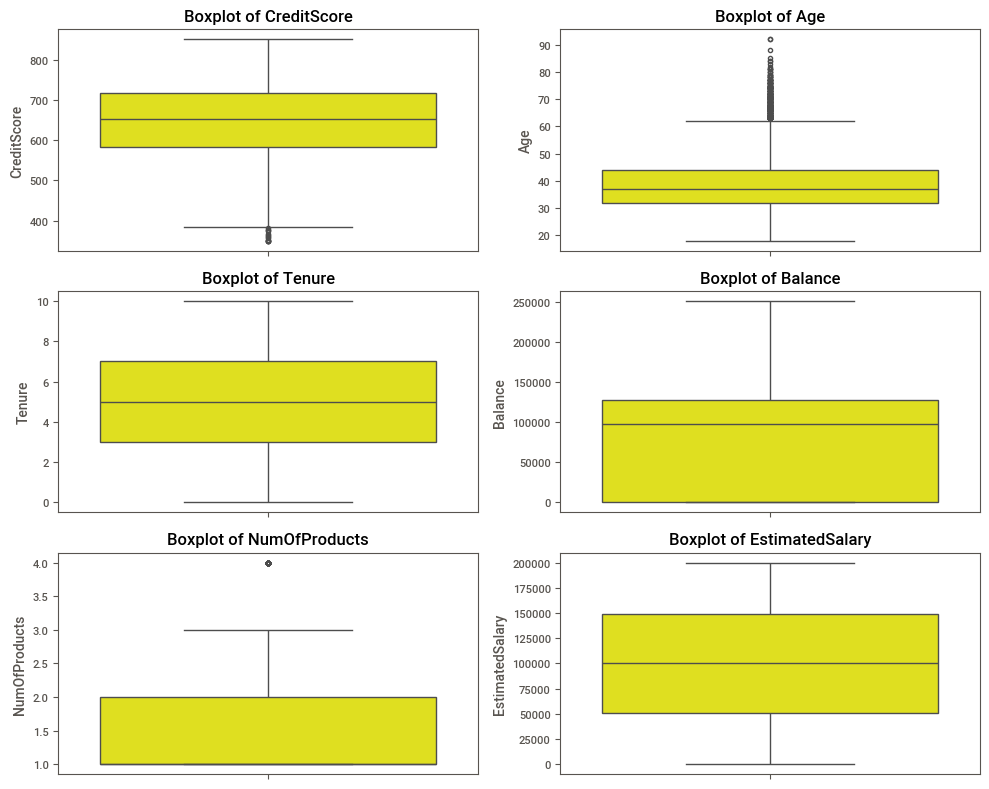

In [142]:
# Step 1: Visualize outliers using boxplots for numerical features

plt.figure(figsize=(10, 8))
for i, column in enumerate(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[column], color='yellow')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# **Outliers Observations**:
* **Credit Score:** A few outliers exist, but they aren't extreme enough to warrant removal.
* **Age:** There are a few higher outliers above age 70, but again, these may represent valid customers.
* **Tenure:** No significant outliers observed.
* **Products Number:** A few outliers for customers with more than 3 products.
* **Estimated Salary:** No significant outliers.
* **Balance:** The missing lower whisker suggests that a large number of customers have a balance of zero. This is typical in banking data, where many customers might have inactive or minimal accounts with no balance. Since the upper whisker does exist and likely extends to higher balances, any customers with extremely high balances would be considered outliers.

# **Outlier Handling Strategy:**

For extreme outliers (e.g., high balances), we will apply capping at the 99th percentile to reduce their impact. We will keep less significant outliers, as they likely represent valid data points.

Let's cap the extreme outliers now, particularly for the balance and products_number features.

In [143]:
#Handle outliers by capping at the 1st and 99th percentiles

# Define a function to cap the values based on percentiles
def cap_values(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to 'balance' and 'products_number' (features with visible outliers)
cap_values(df, 'Balance')
cap_values(df, 'NumOfProducts')

# Check to ensure outliers have been capped
df[['Balance', 'NumOfProducts']].describe()


,Balance,NumOfProducts
count,10000.000000,10000.000000
mean,76369.720704,1.524200
std,62172.016053,0.560933
min,0.000000,1.000000
25%,0.000000,1.000000
50%,97198.540000,1.000000
75%,127644.240000,2.000000
max,185967.985400,3.000000


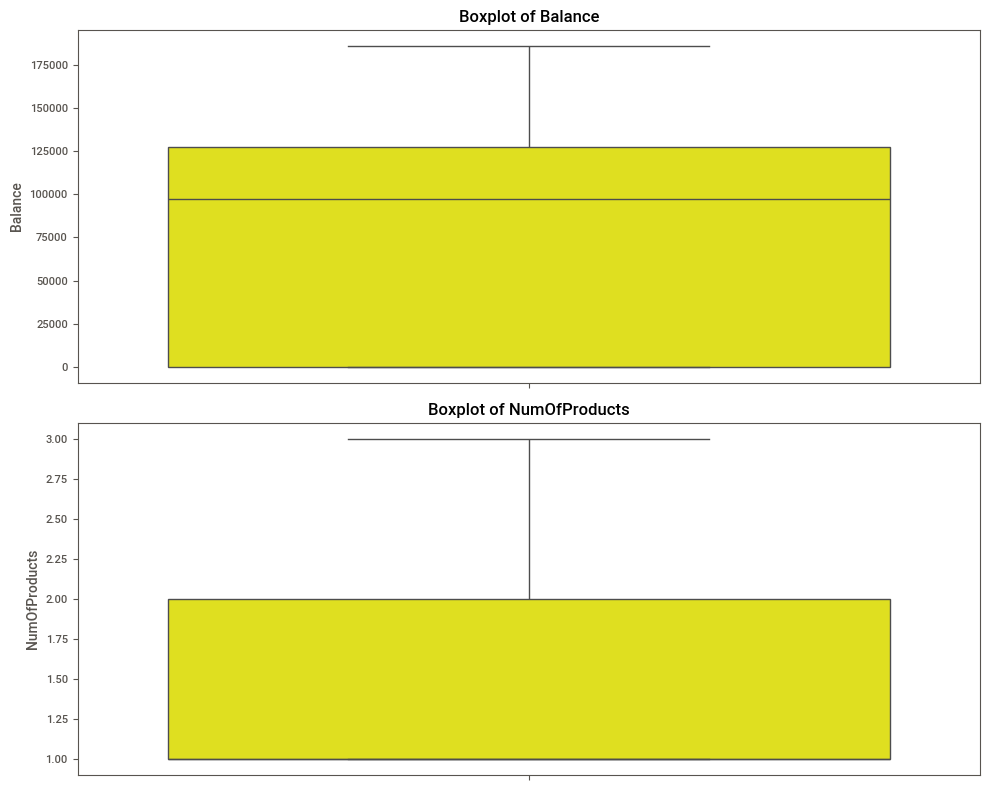

In [144]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(['Balance', 'NumOfProducts'], 1):
    plt.subplot(2, 1, i)
    sns.boxplot(y=df[column], color='yellow')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

The extreme values in balance and products_number have been capped at the 99th percentile, effectively reducing the impact of outliers.

# **Feature Engineering:**

we've explored the dataset thoroughly, we can move on to feature engineering to enhance model performance. We can create new features, handle categorical data (like one-hot encoding for categorical features), and prepare the data for machine learning models.
Based on the EDA, we'll take the following steps to prepare the dataset for modeling:

1. **Handle Categorical Variables:** Convert the categorical variables (country, gender) into numerical format using one-hot encoding, which will create separate binary columns for each category.
2. **Feature Scaling:** Normalize or standardize features that have large ranges (e.g., balance, age, estimated_salary). This step is particularly important for algorithms that are sensitive to the scale of features (like logistic regression or neural networks).
3. **Create New Features:**
* ***Balance-to-Salary Ratio:*** Create a new feature that represents the ratio of balance to estimated_salary as it may provide insight into a customer's financial standing relative to their income.
* ***Is Senior Customer:*** Create a binary feature to capture customers who are above a certain age (e.g., 60), since older customers tend to have a higher churn rate. Added a binary feature (is_senior) to indicate whether the customer is above 60 years old.


In [145]:
# Step 1: Handle categorical variables with one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

In [146]:
# Step 2: Create new features
# Balance-to-salary ratio
df_encoded['balance_salary_ratio'] = df_encoded['Balance'] / (df_encoded['EstimatedSalary'] + 1e-5)  # Adding small value to avoid division by zero

In [147]:
# Is senior customer (binary feature: 1 if age > 60, else 0)
df_encoded['is_senior'] = df_encoded['Age'].apply(lambda x: 1 if x > 60 else 0)



In [148]:
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,balance_salary_ratio,is_senior
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,2,464,False,False,False,False,False,False,0.000000,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,3,456,False,True,False,False,False,False,0.744677,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,3,377,False,False,False,False,False,False,1.401375,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,5,350,False,False,False,True,False,False,0.000000,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,5,425,False,True,False,True,False,False,1.587055,0


In [149]:
# Step 3: Feature Scaling (normalizing balance, age, estimated_salary)
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler=StandardScaler()

# Fit and transform the selected columns
df_encoded[['Balance', 'Age', 'EstimatedSalary', 'balance_salary_ratio']] = scaler.fit_transform(df_encoded[['Balance', 'Age', 'EstimatedSalary', 'balance_salary_ratio']])


In [150]:
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,balance_salary_ratio,is_senior
0,1,15634602,Hargrave,619,0.293517,2,-1.228423,1,1,1,...,2,464,False,False,False,False,False,False,-0.035762,0
1,2,15647311,Hill,608,0.198164,1,0.119644,1,0,1,...,3,456,False,True,False,False,False,False,-0.028887,0
2,3,15619304,Onio,502,0.293517,8,1.339755,3,1,0,...,3,377,False,False,False,False,False,False,-0.022825,0
3,4,15701354,Boni,699,0.007457,1,-1.228423,2,0,0,...,5,350,False,False,False,True,False,False,-0.035762,0
4,5,15737888,Mitchell,850,0.388871,2,0.790445,1,1,1,...,5,425,False,True,False,True,False,False,-0.021111,0


# **Addressing Class Imbalance:**

We had previously observed that the target variable (churn) is imbalanced (about 20% churn), this could lead to biased models that favor the majority class (non-churn).
* Common methods to handle class imbalance:
     * **Oversampling:** Increase the number of churn cases by duplicating them (e.g., using SMOTE). This technique creates synthetic samples for the minority class (churned customers) to balance the dataset.
     * **Undersampling:** Reduce the number of non-churn cases.  This reduces the size of the majority class (non-churned customers) to balance the dataset.
     * **Class Weights:** Many machine learning algorithms (like logistic regression, decision trees) have a class_weight parameter to assign more weight to the minority class during training.




Next Steps are as follows:

1. **Split the Data:**
Train-Test Split: Split the data into training and test sets (e.g., 70% train, 30% test) to ensure you can evaluate the model on unseen data.
2. **Select and Train Models:**
* **Model Selection:** Select a model based on the its performance. In this case we will use LazyPredict to pick the best fit model
* **Class Weights:** Apply class weights to handle the class imbalance during training.
3. **Model Evaluation:**
* **Metrics:** Focus on key evaluation metrics, especially for the minority class (churn) Precision, Recall, F1-Score (especially recall to capture churn correctly).
* **Confusion Matrix:** To check true positives and false positives for churn.
* **Cross-Validation:** Use cross-validation to ensure model robustness.
4. **Hyperparameter Tuning:**
* **Grid Search or Random Search:** Optimize model parameters to improve performance, particularly for models like Random Forest and Gradient Boosting.
5. **Test on the Unseen Data:**
Evaluate the tuned model on the test set to get the final performance metrics.
6. **Model Selection and Finalization:**
Based on performance (recall, F1-score, etc.), select the best model for predicting churn.


In [151]:
from sklearn.model_selection import train_test_split

#Define independent features and target feature
# We are exluding churn and customer_id since customer_id, Surname, is least important feature for ML

X=df_encoded.drop(columns=['CustomerId', 'Surname', 'Exited'])
y=df_encoded['Exited']

#Split the data into training and test sets (70% train, 30% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

# Display the shape of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7000, 20)
X_test shape: (3000, 20)
y_train shape: (7000,)
y_test shape: (3000,)


#Apply Smote-ENN

In [152]:
X_train.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,balance_salary_ratio,is_senior
7680,7681,808,-1.327494,7,-1.228423,2,0,1,-1.337386,0,4,387,False,True,True,True,False,False,-0.035762,0
1837,1838,561,1.628468,7,1.228738,2,1,0,0.575174,1,2,377,False,False,True,True,False,False,-0.025172,0
2920,2921,696,-0.564665,4,-1.228423,2,1,1,-0.464610,0,3,348,False,False,False,False,True,False,-0.035762,0
2642,2643,637,-1.613554,5,0.360796,1,1,0,0.396040,0,2,430,False,True,False,False,False,True,-0.028339,0
4800,4801,690,0.007457,6,-1.228423,2,1,0,1.051037,0,1,517,False,False,True,False,True,False,-0.035762,0


In [153]:
# Apply SMOTE-ENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [186]:
# Import necessary classes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('abc',  AdaBoostClassifier())], voting='soft')))

#Evaluate the model

In [188]:
# Import necessary classes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
#Import model_selection for KFold and cross_val_score
from sklearn import model_selection
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10,)

    # Add error handling to catch exceptions during cross-validation
    try:
        cv_acc_results = model_selection.cross_val_score(model, X_resampled, y_resampled,
                        cv = kfold, scoring="accuracy")
    except ValueError as e:
        print(f"Error during cross-validation for {name}: {e}")
        # Skip this model and continue with the next
        continue

    acc_results.append(cv_acc_results)

    model_results.loc[i] = [name,
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1



model_results.sort_values(by = ['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
1,SVC,99.84,0.13
2,Kernel SVM,99.82,0.13
4,Gaussian NB,99.72,0.19
0,Logistic Regression,99.71,0.22
7,Adaboost,98.28,4.37
3,KNN,96.66,3.23
6,Random Forest,95.08,14.55
8,Gradient boost classifier,94.24,16.29
9,Voting Classifier,94.24,16.29
5,Decision Tree Classifier,93.80,16.19


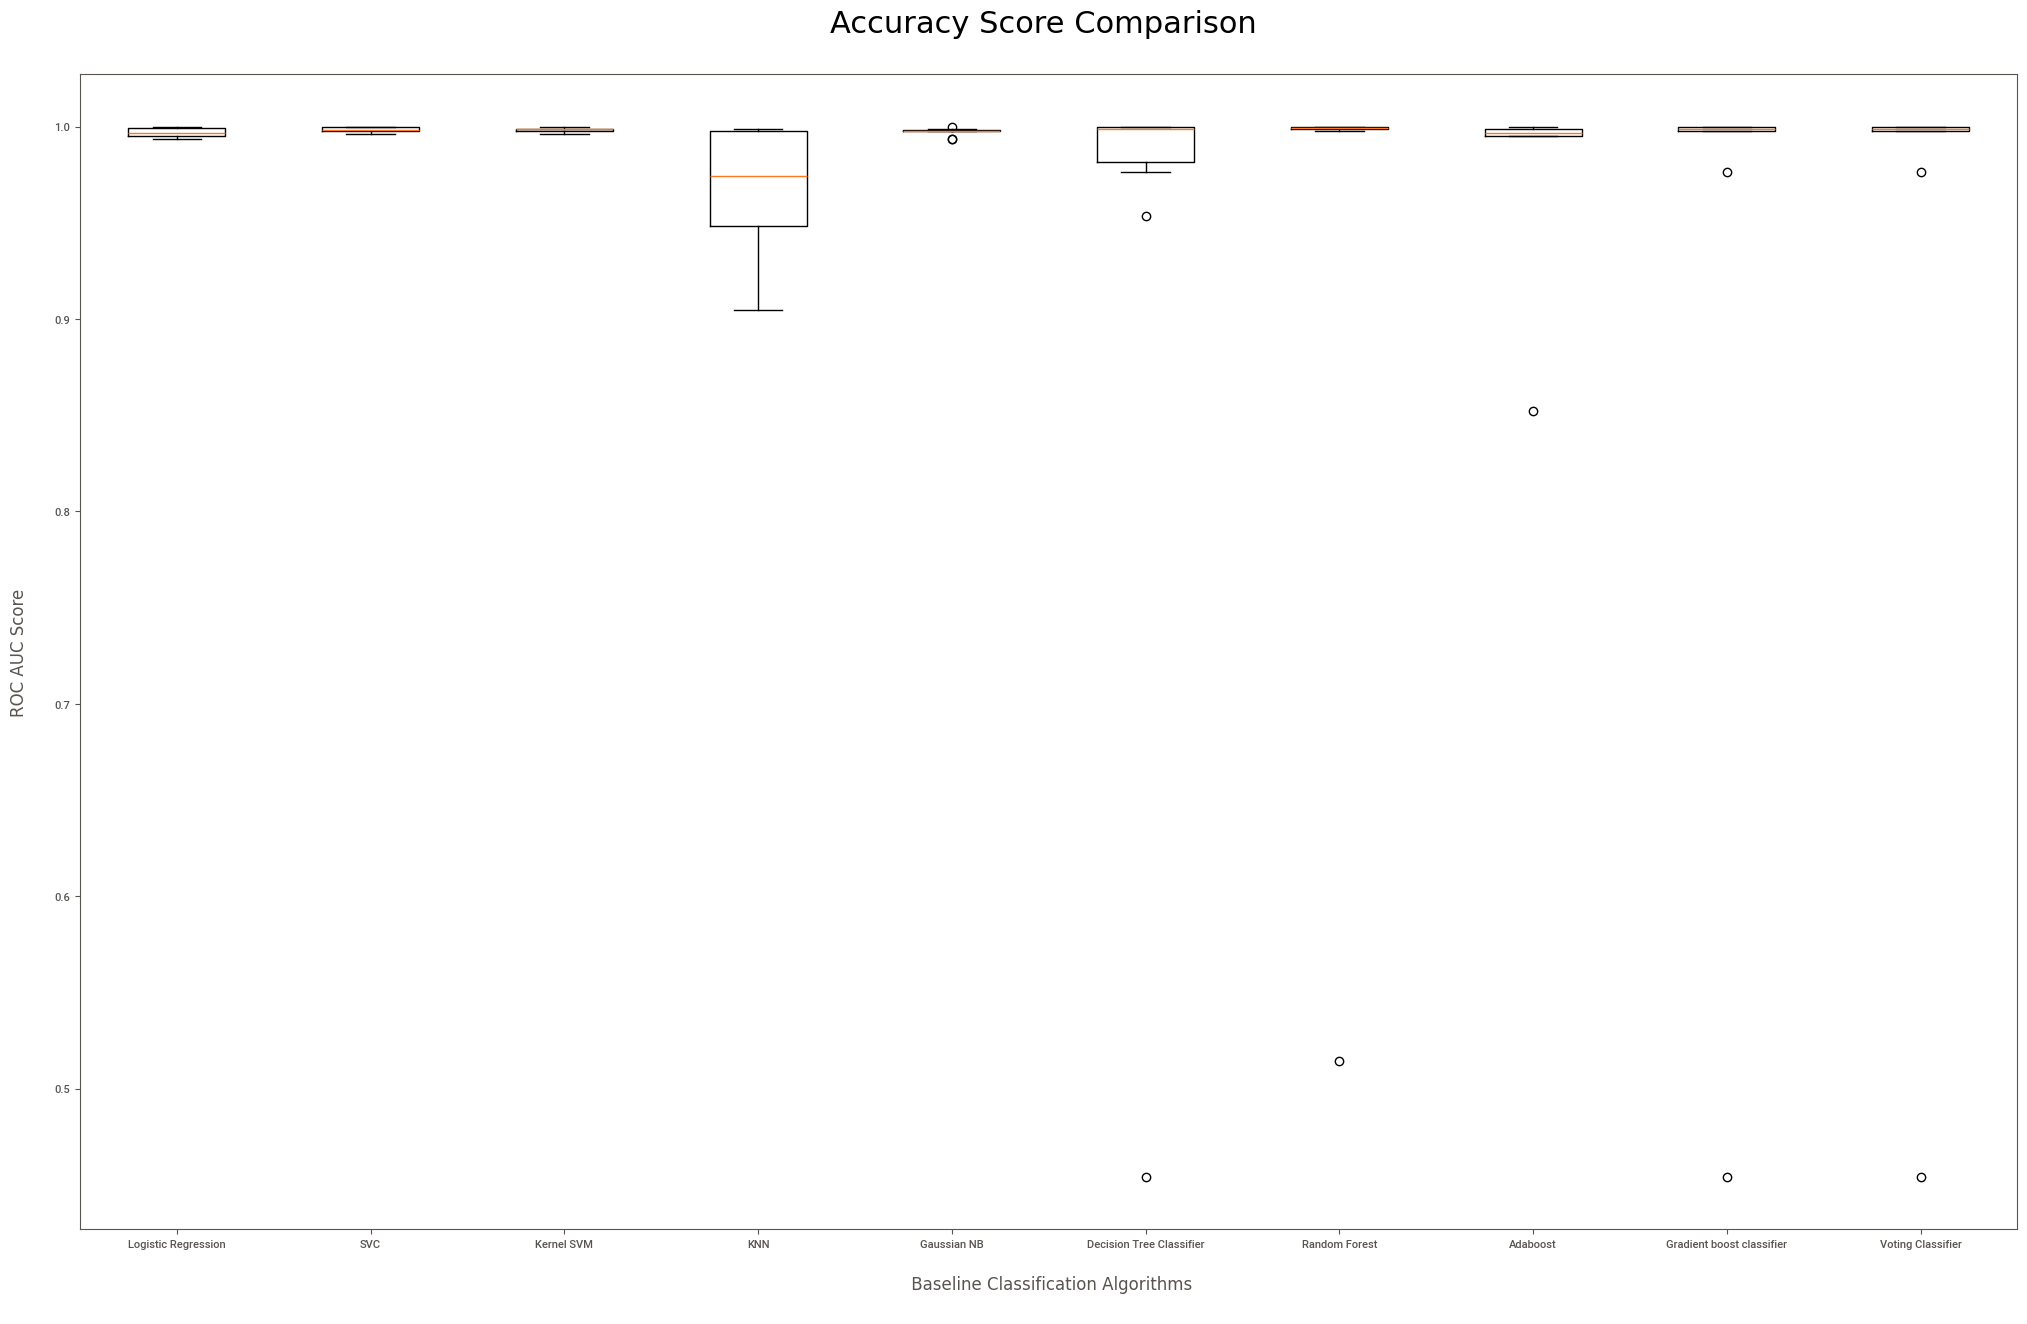

In [189]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)

# Only use the names of the models that were successfully cross-validated
ax.set_xticklabels(names[:len(acc_results)]) # This line is changed


plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#KNN

In [157]:
score_array = []

for each in range(1,45):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_resampled, y_resampled)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.545,
 0.5803333333333334,
 0.502,
 0.533,
 0.479,
 0.506,
 0.4686666666666667,
 0.49533333333333335,
 0.454,
 0.48033333333333333,
 0.44566666666666666,
 0.4656666666666667,
 0.43466666666666665,
 0.45466666666666666,
 0.43533333333333335,
 0.45366666666666666,
 0.4256666666666667,
 0.443,
 0.42133333333333334,
 0.432,
 0.4073333333333333,
 0.4266666666666667,
 0.4026666666666667,
 0.4146666666666667,
 0.393,
 0.41,
 0.387,
 0.4023333333333333,
 0.386,
 0.3953333333333333,
 0.37933333333333336,
 0.3903333333333333,
 0.369,
 0.38666666666666666,
 0.368,
 0.37966666666666665,
 0.361,
 0.37366666666666665,
 0.3606666666666667,
 0.37433333333333335,
 0.35633333333333334,
 0.36866666666666664,
 0.35233333333333333,
 0.36533333333333334]

In [158]:
best_score = np.max(score_array)
best_score

0.5803333333333334

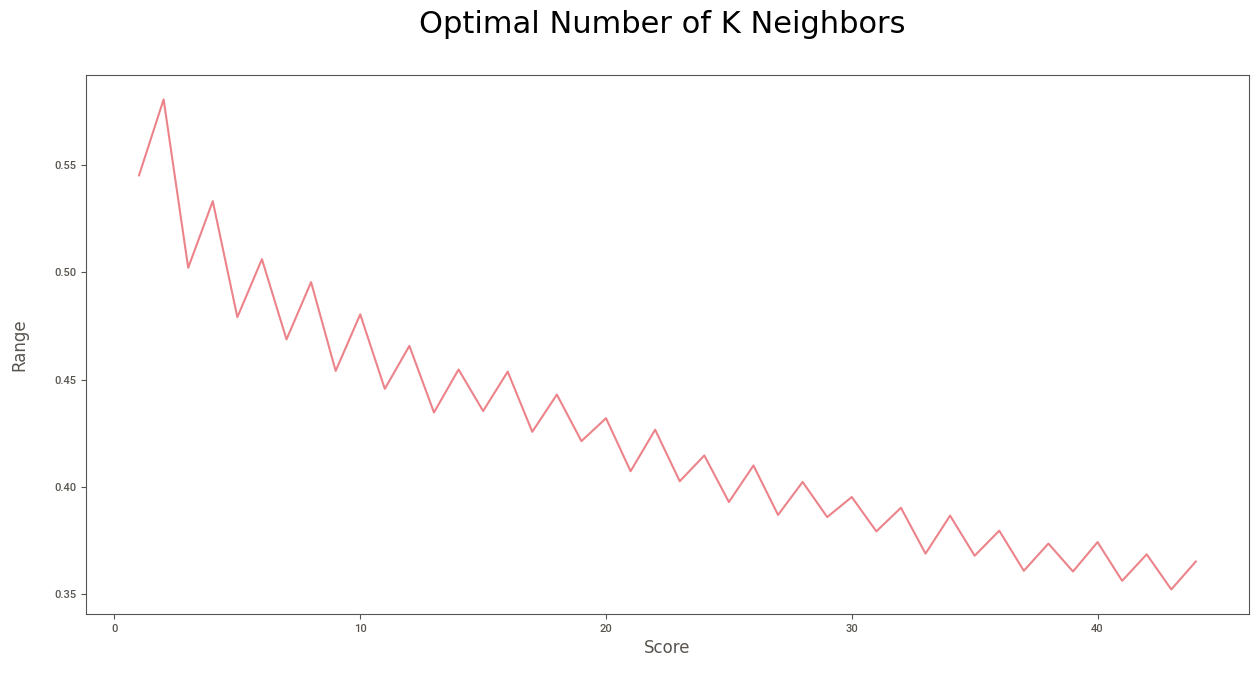

In [159]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,45),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#Random Forest

In [160]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_resampled,y_resampled)
    score_array.append(rf_loop.score(X_test,y_test))



In [161]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.9983333333333333
2 : 0.984
3 : 0.9986666666666667
4 : 0.9963333333333333
5 : 0.998
6 : 0.997
7 : 0.998
8 : 0.998
9 : 0.9986666666666667
10 : 0.9983333333333333
11 : 0.9986666666666667
12 : 0.9986666666666667
13 : 0.9986666666666667
14 : 0.9986666666666667
15 : 0.9986666666666667
16 : 0.9986666666666667
17 : 0.9986666666666667
18 : 0.9986666666666667
19 : 0.9986666666666667
20 : 0.9986666666666667
21 : 0.9986666666666667
22 : 0.9986666666666667
23 : 0.9986666666666667
24 : 0.9986666666666667
25 : 0.9986666666666667
26 : 0.9986666666666667
27 : 0.9986666666666667
28 : 0.9986666666666667
29 : 0.9986666666666667
30 : 0.9986666666666667
31 : 0.9986666666666667
32 : 0.9986666666666667
33 : 0.9986666666666667
34 : 0.9986666666666667
35 : 0.9986666666666667
36 : 0.9986666666666667
37 : 0.9986666666666667
38 : 0.9986666666666667
39 : 0.9986666666666667
40 : 0.9986666666666667
41 : 0.9986666666666667
42 : 0.9986666666666667
43 : 0.9986666666666667
44 : 0.9986666666666667
45 : 0.99866666666

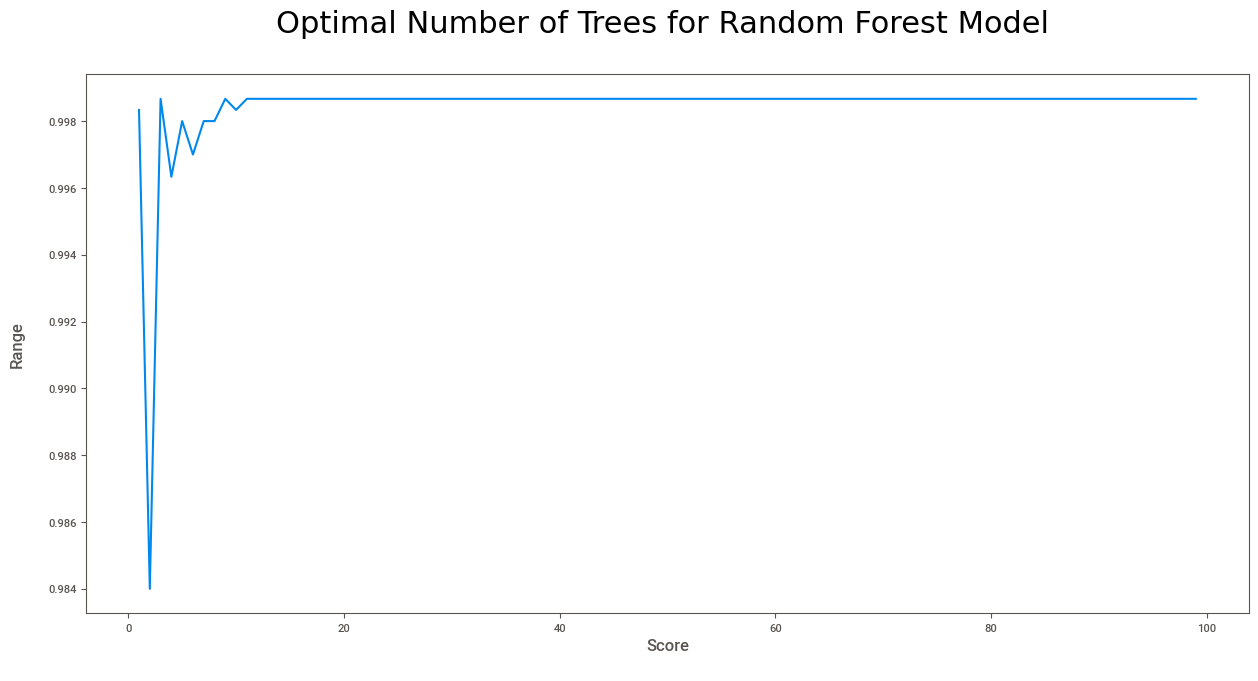

In [162]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,len(score_array)+1),score_array)
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", )

plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large")

plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#2nd ilteration

In [163]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [164]:
#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_resampled, y_resampled)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_resampled, y_resampled)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_resampled, y_resampled)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_resampled, y_resampled)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_resampled, y_resampled)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_resampled, y_resampled)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_resampled, y_resampled)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score # Import necessary metrics

svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")

In [166]:
# Combine all model evaluation results into a single DataFrame using pd.concat
eval_ = pd.concat([svm, knn, k_svm, nb, dt, rf, ab, gb,], ignore_index=True)

# Sort the combined DataFrame by Precision, Recall, and F2 Score in descending order
eval_ = eval_.sort_values(by=["Precision", "Recall", "F2 Score"], ascending=False).reset_index(drop=True)

# Display the final evaluation DataFrame
print(eval_)

                  Model  Accuracy  Precision    Recall  F1 SCore  F2 Score
0        Gradient Boost  0.998333   0.998355  0.993453  0.995898  0.994430
1          SVM (Linear)  0.998667   0.996727  0.996727  0.996727  0.996727
2         Random Forest  0.998667   0.996727  0.996727  0.996727  0.996727
3              Adaboost  0.998667   0.996727  0.996727  0.996727  0.996727
4         Decision Tree  0.998000   0.996716  0.993453  0.995082  0.994104
5           Naive Bayes  0.997333   0.990244  0.996727  0.993475  0.995423
6            Kernel SVM  0.203667   0.203667  1.000000  0.338410  0.561168
7  K-Nearest Neighbours  0.426667   0.203634  0.623568  0.307010  0.441483


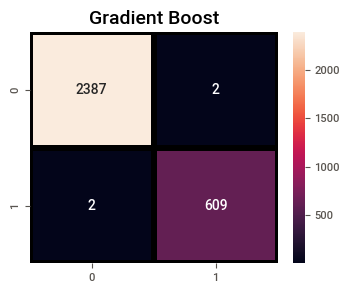

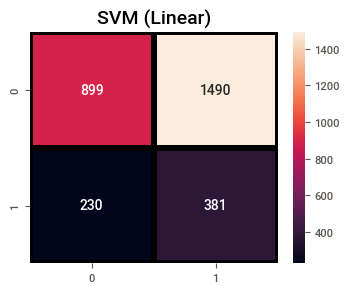

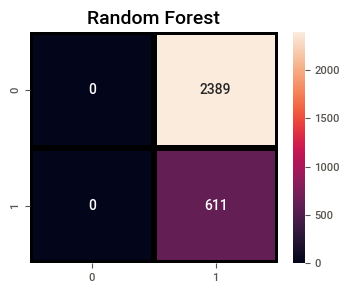

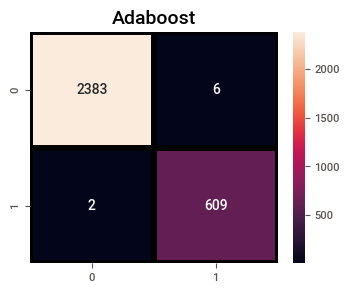

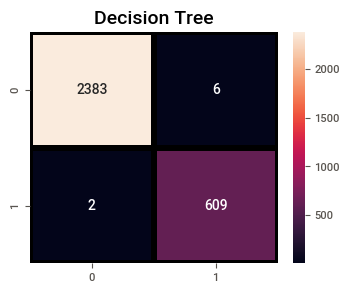

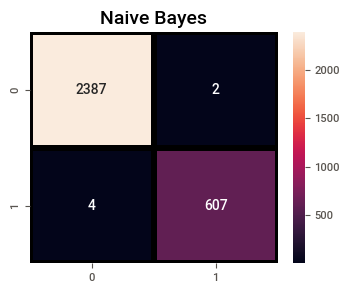

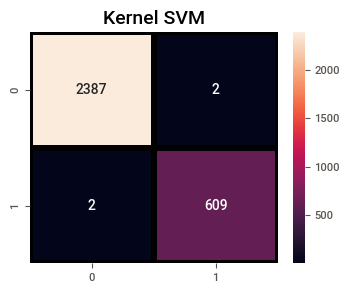

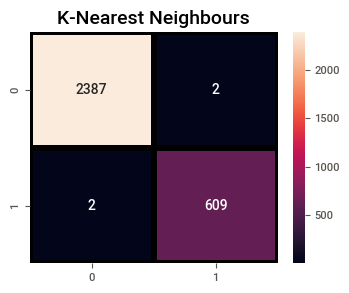

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predictions = [y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9,]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()

<b>k-Fold Cross-Validation</b>: Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [168]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_resampled, y=y_resampled, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [169]:
from sklearn.model_selection import cross_val_score
k_fold_cross_validation(classifier8, "Adaboost")


Adaboost accuracy: 1.00 (+/- 0.00)


In [170]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 1.00 (+/- 0.00)


In [171]:
k_fold_cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.60 (+/- 0.00)


#Hyperparameter tuning

#Using Randomized search CV

In [172]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_resampled, y_resampled)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [173]:
gridSearchAda.best_params_, gridSearchAda.best_score_


({'n_estimators': 420, 'learning_rate': 0.01}, 0.9999596566643018)

In [174]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_resampled, y_resampled)

In [175]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(X_test.values.reshape(X_test.shape[0], -1))[:,1]
# Use .values to get the NumPy array representation of the DataFrame
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.9967122908529888

#Gradient Boost

In [176]:
gbHyperParams = {'loss' : ['deviance', 'exponential']}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_resampled, y_resampled)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential']},
                   scoring='roc_auc')

In [177]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential'}, 0.9993197278911564)

In [178]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_resampled, y_resampled)

In [179]:
# Getting the score GradientBoost
test_labels_GB = bestGBModFitted.predict_proba(X_test.values.reshape(X_test.shape[0], -1))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

0.9981646649708601

#LSTM-SAE

In [180]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN

# Define the LSTM Stacked Autoencoder
class LSTMSAE(nn.Module):
    def __init__(self, input_dim):
        super(LSTMSAE, self).__init__()
        self.encoder_lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.encoder_lstm2 = nn.LSTM(64, 32, batch_first=True)
        self.decoder_lstm = nn.LSTM(32, 64, batch_first=True)
        self.decoder_lstm2 = nn.LSTM(64, input_dim, batch_first=True)
        self.fc = nn.Linear(input_dim, 1)  # For churn prediction

    def forward(self, x):
        out, _ = self.encoder_lstm(x)
        x, _ = self.encoder_lstm2(out)
        x, _ = self.decoder_lstm(x)
        x, _ = self.decoder_lstm2(x)
        return x, self.fc(x[:, -1])  # Return reconstructed input and prediction

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Normalize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Reshape the data to [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
input_dim = X_train_lstm.shape[2]
model = LSTMSAE(input_dim)
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    reconstructed, predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    _, test_predictions = model(X_test_tensor)
    predicted_classes = (torch.sigmoid(test_predictions) > 0.5).float()  # Convert to binary
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())

print(f'Test Accuracy: {accuracy:.4f}')

Epoch [10/1000], Loss: 0.6928
Epoch [20/1000], Loss: 0.6870
Epoch [30/1000], Loss: 0.6772
Epoch [40/1000], Loss: 0.6537
Epoch [50/1000], Loss: 0.6020
Epoch [60/1000], Loss: 0.5214
Epoch [70/1000], Loss: 0.4299
Epoch [80/1000], Loss: 0.3526
Epoch [90/1000], Loss: 0.2925
Epoch [100/1000], Loss: 0.2441
Epoch [110/1000], Loss: 0.2054
Epoch [120/1000], Loss: 0.1750
Epoch [130/1000], Loss: 0.1487
Epoch [140/1000], Loss: 0.1238
Epoch [150/1000], Loss: 0.1007
Epoch [160/1000], Loss: 0.0801
Epoch [170/1000], Loss: 0.0628
Epoch [180/1000], Loss: 0.0491
Epoch [190/1000], Loss: 0.0386
Epoch [200/1000], Loss: 0.0310
Epoch [210/1000], Loss: 0.0255
Epoch [220/1000], Loss: 0.0215
Epoch [230/1000], Loss: 0.0185
Epoch [240/1000], Loss: 0.0163
Epoch [250/1000], Loss: 0.0145
Epoch [260/1000], Loss: 0.0132
Epoch [270/1000], Loss: 0.0121
Epoch [280/1000], Loss: 0.0112
Epoch [290/1000], Loss: 0.0104
Epoch [300/1000], Loss: 0.0098
Epoch [310/1000], Loss: 0.0092
Epoch [320/1000], Loss: 0.0081
Epoch [330/1000],

In [182]:
# Evaluate the model on the test set
with torch.no_grad():  # Disable gradient calculation during inference
    # Reshape X_test to have a sequence length of 1
    X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    _, test_predictions = model(torch.tensor(X_test_reshaped, dtype=torch.float32))
    y_pred = (torch.sigmoid(test_predictions) > 0.5).int().numpy().squeeze()

In [183]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())
precision = precision_score(y_test_tensor.numpy(), predicted_classes.numpy())
recall = recall_score(y_test_tensor.numpy(), predicted_classes.numpy())
f1 = f1_score(y_test_tensor.numpy(), predicted_classes.numpy())
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted_classes.numpy())

In [184]:
# Print the evaluation results
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Test Accuracy: 0.9981
Test Precision: 0.9978
Test Recall: 0.9989
Test F1 Score: 0.9984
Confusion Matrix:
[[665   2]
 [  1 926]]


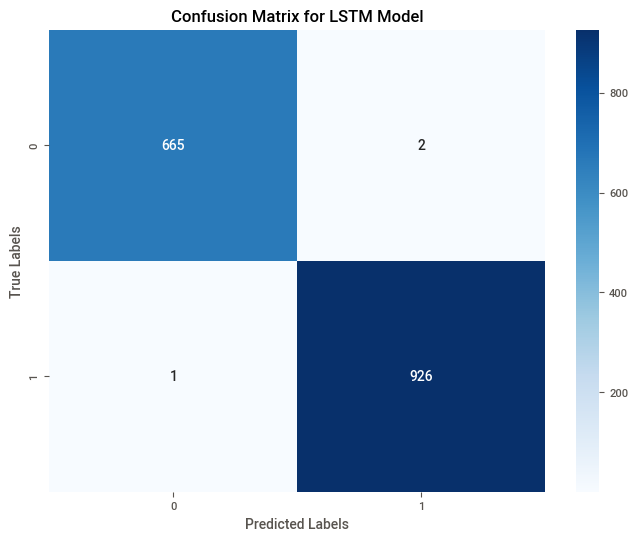

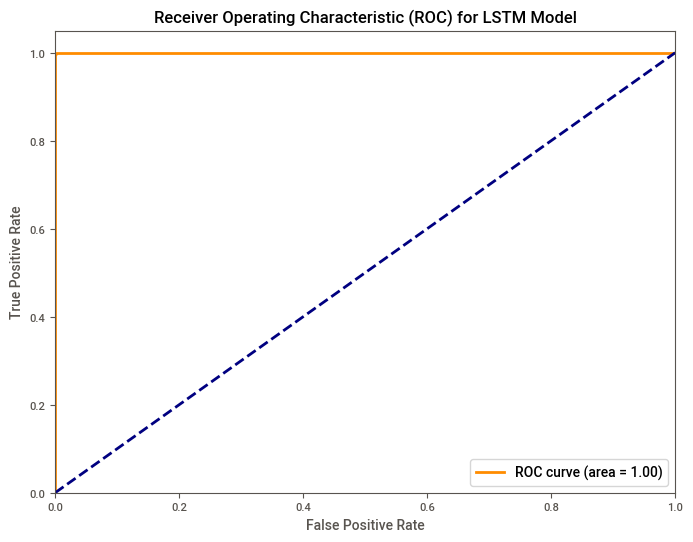

In [185]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

# Plot ROC curve
y_pred_proba = torch.sigmoid(test_predictions).numpy()
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), y_pred_proba)
roc_auc = roc_auc_score(y_test_tensor.numpy(), y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LSTM Model')
plt.legend(loc="lower right")
plt.show()
